In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set(rc={'figure.figsize':(11,7)})

In [2]:
df1 = pd.read_csv('owid-co2-data.csv')


In [3]:
df2 = pd.read_csv('CO2_cleaned.csv', index_col=0)
df2 = df2.drop(['Code', 'Calling Code', 'CO2 emission (Tons)', 'Population(2022)'], axis=1)
df2 = df2.rename({'Country': 'country', 'Year': 'year'}, axis=1)
df2 = df2.replace(['/km²', '%', ','], '', regex=True)
df2['Density(km2)'] = df2['Density(km2)'].astype('int')
df2

,country,year,Area,% of World,Density(km2)
0,Afghanistan,1750,652230.0,0.40,63
1,Afghanistan,1751,652230.0,0.40,63
2,Afghanistan,1752,652230.0,0.40,63
3,Afghanistan,1753,652230.0,0.40,63
4,Afghanistan,1754,652230.0,0.40,63
...,...,...,...,...,...
59615,Zimbabwe,2016,390757.0,0.30,42
59616,Zimbabwe,2017,390757.0,0.30,42
59617,Zimbabwe,2018,390757.0,0.30,42
59618,Zimbabwe,2019,390757.0,0.30,42


In [4]:
df1 = df1.merge(df2, on=['country', 'year'], how='left')

df1

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,Area,% of World,Density(km2)
0,Afghanistan,1949,AFG,7624058.0,NaN,NaN,NaN,0.015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,652230.0,0.40,63.0
1,Afghanistan,1950,AFG,7752117.0,9.421400e+09,NaN,NaN,0.084,0.070,475.00,...,NaN,0.00,NaN,NaN,NaN,NaN,NaN,652230.0,0.40,63.0
2,Afghanistan,1951,AFG,7840151.0,9.692280e+09,NaN,NaN,0.092,0.007,8.70,...,NaN,0.00,NaN,NaN,NaN,NaN,NaN,652230.0,0.40,63.0
3,Afghanistan,1952,AFG,7935996.0,1.001733e+10,NaN,NaN,0.092,0.000,0.00,...,NaN,0.00,NaN,NaN,NaN,NaN,NaN,652230.0,0.40,63.0
4,Afghanistan,1953,AFG,8039684.0,1.063052e+10,NaN,NaN,0.106,0.015,16.00,...,NaN,0.00,NaN,NaN,NaN,NaN,NaN,652230.0,0.40,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26003,Zimbabwe,2016,ZWE,14030338.0,2.096179e+10,0.639,0.046,10.738,-1.488,-12.17,...,NaN,0.03,NaN,115.92,28.53,1.415,13.18,390757.0,0.30,42.0
26004,Zimbabwe,2017,ZWE,14236599.0,2.194784e+10,0.678,0.048,9.582,-1.156,-10.77,...,NaN,0.03,NaN,115.59,28.30,1.666,17.39,390757.0,0.30,42.0
26005,Zimbabwe,2018,ZWE,14438812.0,2.271535e+10,0.697,0.048,11.854,2.273,23.72,...,NaN,0.03,NaN,118.22,30.83,1.308,11.04,390757.0,0.30,42.0
26006,Zimbabwe,2019,ZWE,14645473.0,NaN,0.697,0.048,10.949,-0.905,-7.64,...,NaN,0.03,NaN,117.96,30.53,1.473,13.45,390757.0,0.30,42.0


In [5]:
df1['country'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Asia (excl. China & India)',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Gu

In [6]:
ita_df = df1[df1['country'] == 'Italy']
ita_df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,Area,% of World,Density(km2)
11930,Italy,1860,ITA,26043812.0,6.710406e+10,NaN,NaN,0.029,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301336.0,0.20,196.0
11931,Italy,1861,ITA,26211633.0,6.713311e+10,NaN,NaN,0.671,0.641,2187.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301336.0,0.20,196.0
11932,Italy,1862,ITA,26382014.0,6.959432e+10,NaN,NaN,1.227,0.557,83.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301336.0,0.20,196.0
11933,Italy,1863,ITA,26554980.0,7.153073e+10,NaN,NaN,1.070,-0.158,-12.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301336.0,0.20,196.0
11934,Italy,1864,ITA,26729079.0,7.084347e+10,NaN,NaN,1.605,0.535,50.00,...,NaN,0.33,NaN,NaN,NaN,NaN,NaN,301336.0,0.20,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12086,Italy,2016,ITA,60663068.0,2.026955e+12,7.680,0.127,358.061,-3.242,-0.90,...,2.02,1.30,0.99,396.95,409.77,97.178,27.14,301336.0,0.20,196.0
12087,Italy,2017,ITA,60673696.0,2.060762e+12,7.711,0.127,352.850,-5.211,-1.46,...,2.09,1.23,1.04,391.74,404.50,105.658,29.94,301336.0,0.20,196.0
12088,Italy,2018,ITA,60627288.0,2.077209e+12,7.757,0.128,349.020,-3.829,-1.09,...,1.93,1.25,1.06,385.22,398.03,117.431,33.65,301336.0,0.20,196.0
12089,Italy,2019,ITA,60550092.0,NaN,7.912,0.131,339.772,-9.248,-2.65,...,1.94,1.22,1.01,376.19,389.00,110.374,32.48,301336.0,0.20,196.0


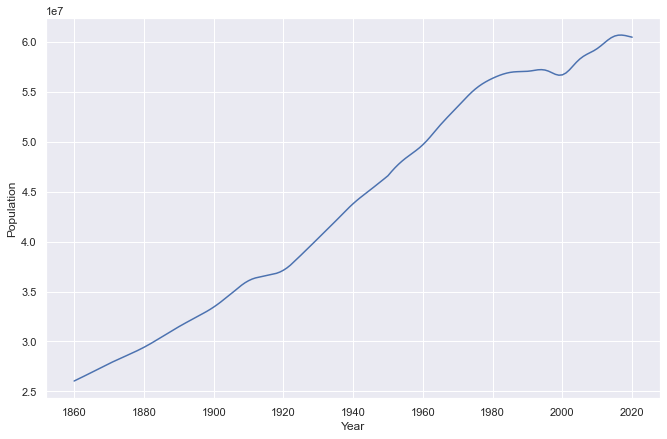

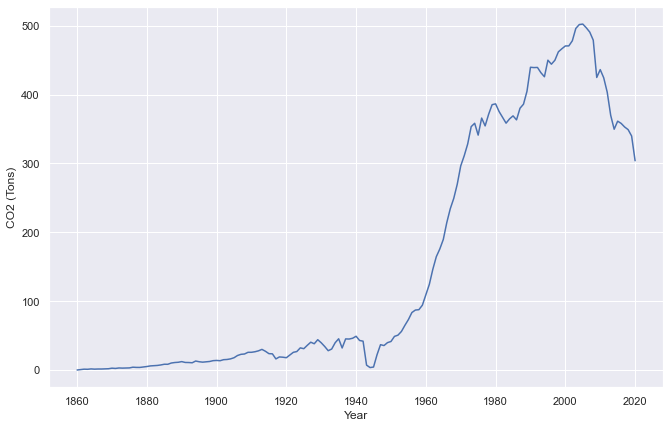

In [7]:
sns.lineplot(data=ita_df, x='year', y='population').set(xlabel='Year', ylabel='Population')
plt.show()
sns.lineplot(data=ita_df, x='year', y='co2').set(xlabel='Year', ylabel='CO2 (Tons)')
plt.show()

In [8]:
fr_df = df1[df1['country'] == 'France']
de_df = df1[df1['country'] == 'Germany']
es_df = df1[df1['country'] == 'Spain']
gr_df = df1[df1['country'] == 'Greece']
pt_df = df1[df1['country'] == 'Portugal']
gb_df = df1[df1['country'] == 'United Kingdom']
nl_df = df1[df1['country'] == 'Netherlands']
hu_df = df1[df1['country'] == 'Hungary']
tr_df = df1[df1['country'] == 'Turkey']
be_df = df1[df1['country'] == 'Belgium']
dk_df = df1[df1['country'] == 'Denmark']
fi_df = df1[df1['country'] == 'Finland']
se_df = df1[df1['country'] == 'Sweden']

In [9]:
dfs = [ita_df, fr_df, de_df, es_df, gr_df, pt_df, gb_df, nl_df, hu_df, tr_df, be_df, dk_df, fi_df, se_df]
eu_df = pd.concat(dfs)
eu_df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,Area,% of World,Density(km2)
11930,Italy,1860,ITA,26043812.0,6.710406e+10,NaN,NaN,0.029,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301336.0,0.20,196.0
11931,Italy,1861,ITA,26211633.0,6.713311e+10,NaN,NaN,0.671,0.641,2187.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301336.0,0.20,196.0
11932,Italy,1862,ITA,26382014.0,6.959432e+10,NaN,NaN,1.227,0.557,83.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301336.0,0.20,196.0
11933,Italy,1863,ITA,26554980.0,7.153073e+10,NaN,NaN,1.070,-0.158,-12.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301336.0,0.20,196.0
11934,Italy,1864,ITA,26729079.0,7.084347e+10,NaN,NaN,1.605,0.535,50.00,...,NaN,0.33,NaN,NaN,NaN,NaN,NaN,301336.0,0.20,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22311,Sweden,2016,SWE,9836003.0,4.431636e+11,1.554,0.158,43.262,-0.341,-0.78,...,0.03,0.25,0.20,33.74,50.39,26.678,61.67,450295.0,0.30,23.0
22312,Sweden,2017,SWE,9904895.0,4.545437e+11,1.484,0.150,42.594,-0.668,-1.54,...,0.03,0.24,0.21,33.42,49.99,27.954,65.63,450295.0,0.30,23.0
22313,Sweden,2018,SWE,9971630.0,4.634074e+11,1.607,0.161,42.095,-0.498,-1.17,...,0.03,0.24,0.18,30.88,47.19,28.959,68.79,450295.0,0.30,23.0
22314,Sweden,2019,SWE,10036391.0,NaN,1.349,0.134,40.937,-1.159,-2.75,...,0.02,0.23,0.17,29.87,46.19,26.952,65.84,450295.0,0.30,23.0


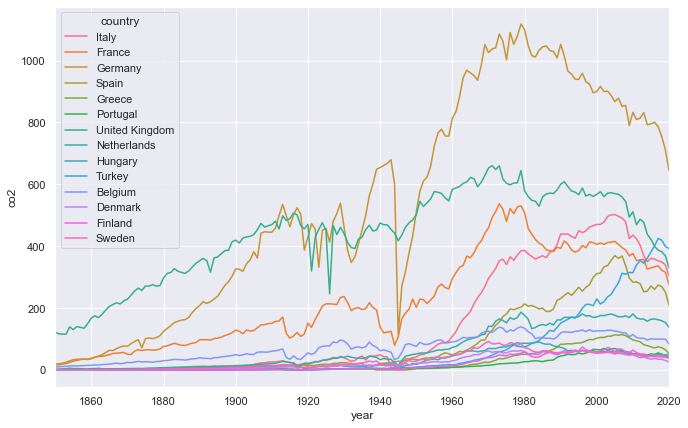

In [10]:
sns.lineplot(data=eu_df, x='year', y='co2', hue='country')
plt.xlim(1850,2020)
plt.show()

In [11]:
eu_df_2020 = eu_df[eu_df['year']==2020]


In [12]:
eu_df_2020.sort_values(by='Density(km2)')

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,Area,% of World,Density(km2)
8545,Finland,2020,FIN,5540718.0,NaN,0.583,0.105,39.288,-3.258,-7.66,...,0.06,0.18,0.20,NaN,NaN,NaN,NaN,338424.0,0.20,16.0
22315,Sweden,2020,SWE,10099270.0,NaN,1.349,0.134,38.635,-2.302,-5.62,...,0.02,0.24,0.18,NaN,NaN,NaN,NaN,450295.0,0.30,23.0
9822,Greece,2020,GRC,10423056.0,NaN,3.360,0.322,52.235,-13.501,-20.54,...,0.15,0.25,0.19,NaN,NaN,NaN,NaN,131990.0,0.10,79.0
21851,Spain,2020,ESP,46754780.0,NaN,9.064,0.194,208.915,-42.584,-16.93,...,0.87,1.07,0.99,NaN,NaN,NaN,NaN,505992.0,0.30,94.0
11007,Hungary,2020,HUN,9660350.0,NaN,1.023,0.106,48.275,-0.804,-1.64,...,0.28,0.17,0.18,NaN,NaN,NaN,NaN,93028.0,0.10,107.0
23591,Turkey,2020,TUR,84339072.0,NaN,35.227,0.418,392.794,-6.551,-1.64,...,1.20,0.96,2.15,NaN,NaN,NaN,NaN,783562.0,0.50,109.0
18997,Portugal,2020,PRT,10196707.0,NaN,2.225,0.218,40.388,-7.241,-15.20,...,0.16,0.20,0.30,NaN,NaN,NaN,NaN,92090.0,0.10,112.0
8764,France,2020,FRA,65273512.0,NaN,6.585,0.101,276.634,-39.297,-12.44,...,1.09,1.46,1.35,NaN,NaN,NaN,NaN,551695.0,0.40,117.0
6013,Denmark,2020,DNK,5792203.0,NaN,1.129,0.195,26.195,-4.702,-15.22,...,0.07,0.15,0.11,NaN,NaN,NaN,NaN,43094.0,0.00,136.0
12090,Italy,2020,ITA,60461828.0,NaN,7.912,0.131,303.815,-35.957,-10.58,...,1.89,1.15,1.03,NaN,NaN,NaN,NaN,301336.0,0.20,196.0


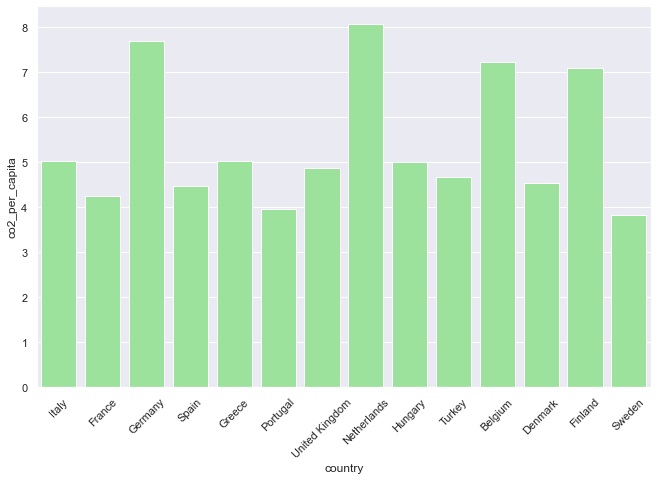

In [13]:
sns.barplot(data=eu_df_2020, x='country', y='co2_per_capita', color='lightgreen')
plt.xticks(rotation=45)
plt.show()

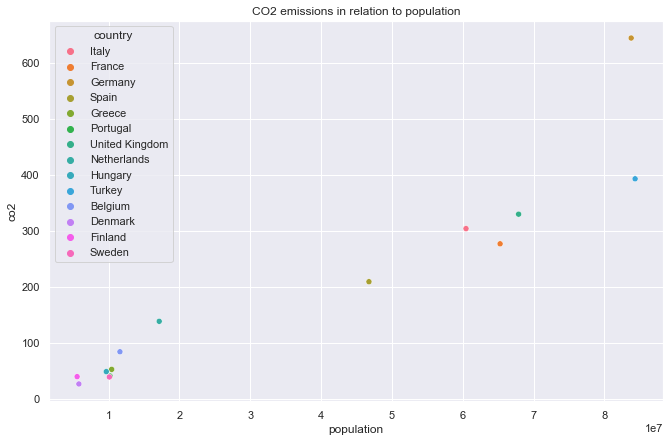

In [14]:
sns.scatterplot(data=eu_df_2020, x='population', y='co2', hue='country').set(title='CO2 emissions in relation to population')
plt.show()

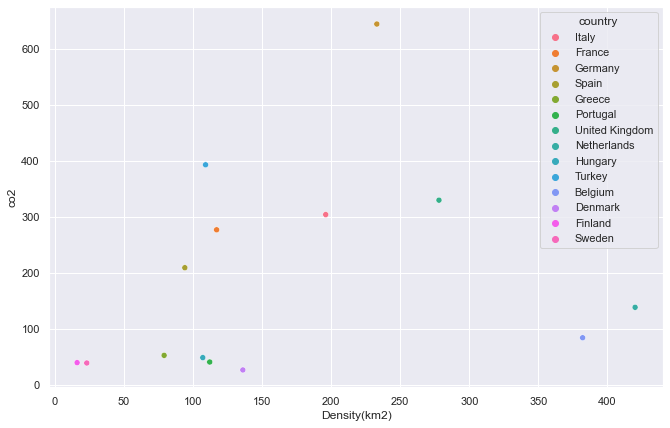

In [15]:
sns.scatterplot(data=eu_df_2020, x='Density(km2)', y='co2', hue='country')
plt.show()

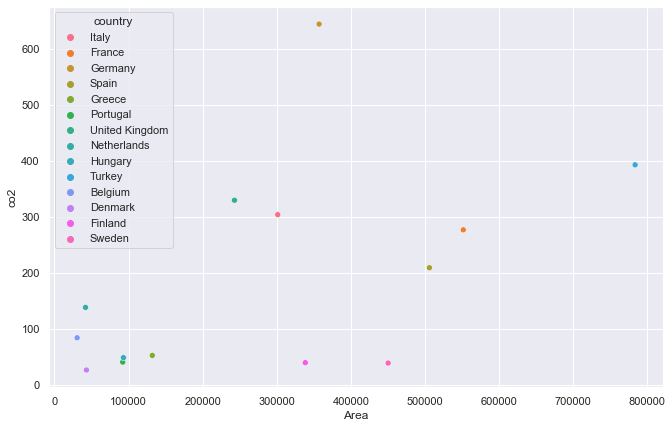

In [16]:
sns.scatterplot(data=eu_df_2020, x='Area', y='co2', hue='country')
plt.show()

In [17]:
eu_df_2019 = eu_df[eu_df['year']==2019]

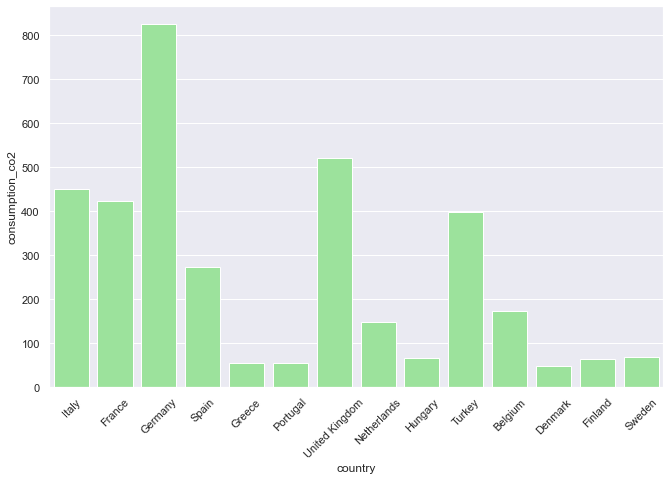

In [18]:
sns.barplot(data=eu_df_2019, x='country', y='consumption_co2', color='lightgreen')
plt.xticks(rotation=45)
plt.show()

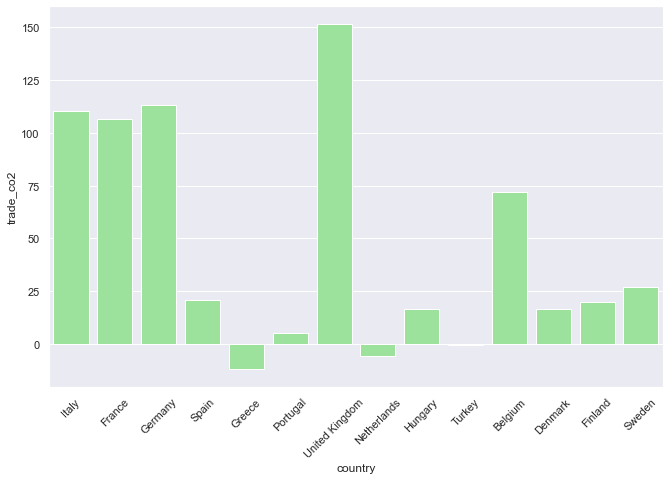

In [19]:
sns.barplot(data=eu_df_2019, x='country', y='trade_co2', color='lightgreen')
plt.xticks(rotation=45)
plt.show()

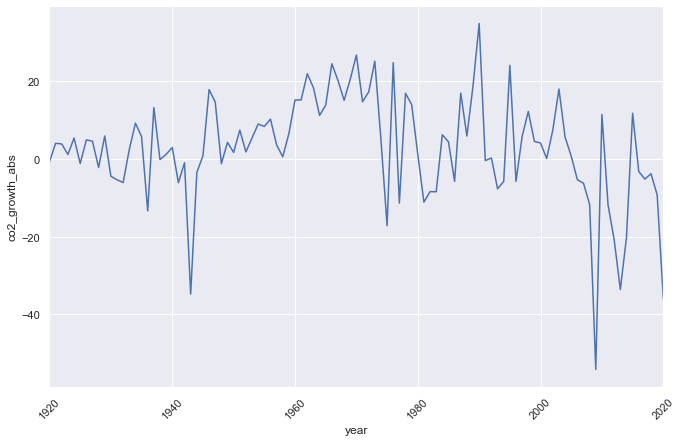

In [20]:
sns.lineplot(data= ita_df, x='year', y='co2_growth_abs')
plt.xticks(rotation=45)
plt.xlim(1920,2020)
plt.show()

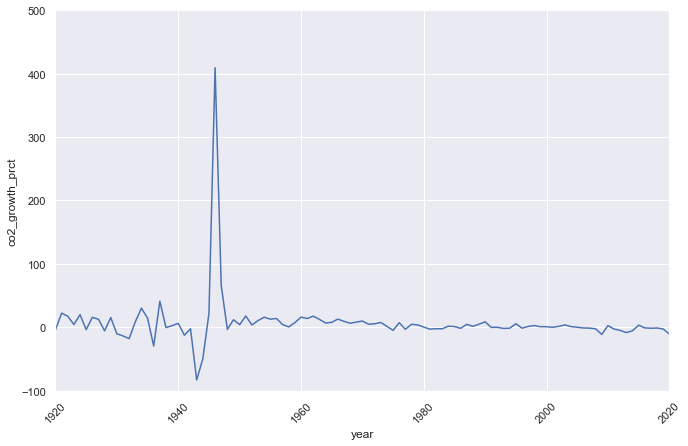

In [21]:
sns.lineplot(data= ita_df, x='year', y='co2_growth_prct')
plt.xticks(rotation=45)
plt.xlim(1920,2020)
plt.ylim(-100,500)
plt.show()

In [22]:
asia_no_ch_in_df = df1[df1['country'] == 'Asia (excl. China & India)']
asia_df = df1[df1['country'] == 'Asia']
eu_27_df = df1[df1['country'] == 'European Union (27)']
africa_df = df1[df1['country'] == 'Africa']
china_df = df1[df1['country'] == 'China']
india_df = df1[df1['country'] == 'India']
na_no_usa_df = df1[df1['country'] == 'North America (excl. USA)']
usa_df = df1[df1['country'] == 'United States']
int_trans_df = df1[df1['country'] == 'International transport']
oce_df = df1[df1['country'] == 'Oceania']
sa_df = df1[df1['country'] == 'South America']
uk_df = df1[df1['country'] == 'United Kingdom']

df_list = [asia_no_ch_in_df, asia_df, eu_27_df, africa_df, china_df, india_df, na_no_usa_df, usa_df, int_trans_df, oce_df, sa_df, uk_df]
sum_df = pd.concat(df_list)

In [23]:
se_cum0 = eu_27_df.groupby('year')['co2'].sum()
df_cum0 = pd.DataFrame(se_cum0, columns=['country', 'co2'])
df_cum0 = df_cum0.assign(country='Europe').reset_index()

In [24]:
df_conc1 = pd.concat([df_cum0, uk_df])
se_cum1 = df_conc1.groupby('year')['co2'].sum()
df_cum1 = pd.DataFrame(se_cum1, columns = ['country','co2'])
df_cum1 = df_cum1.assign(country='United Kingdom').reset_index()



df_conc2 = pd.concat([df_cum1, usa_df])
se_cum2 = df_conc2.groupby('year')['co2'].sum()
df_cum2 = pd.DataFrame(se_cum2, columns=['country', 'co2'])
df_cum2 = df_cum2.assign(country='United States').reset_index()

df_conc3 = pd.concat([df_conc2, na_no_usa_df])
se_cum3 = df_conc3.groupby('year')['co2'].sum()
df_cum3 = pd.DataFrame(se_cum3, columns = ['country','co2'])
df_cum3 = df_cum3.assign(country='North America (excl. US)').reset_index()

df_conc4 = pd.concat([df_conc3, sa_df])
se_cum4 = df_conc4.groupby('year')['co2'].sum()
df_cum4 = pd.DataFrame(se_cum4, columns = ['country','co2'])
df_cum4 = df_cum4.assign(country='South America').reset_index()

df_conc5 = pd.concat([df_conc4, india_df])
se_cum5 = df_conc5.groupby('year')['co2'].sum()
df_cum5 = pd.DataFrame(se_cum5, columns = ['country','co2'])
df_cum5 = df_cum5.assign(country='India').reset_index()

df_conc6 = pd.concat([df_conc5, africa_df])
se_cum6 = df_conc6.groupby('year')['co2'].sum()
df_cum6 = pd.DataFrame(se_cum6, columns = ['country','co2'])
df_cum6 = df_cum6.assign(country='Africa').reset_index()

df_conc7 = pd.concat([df_conc6, asia_no_ch_in_df])
se_cum7 = df_conc7.groupby('year')['co2'].sum()
df_cum7 = pd.DataFrame(se_cum7, columns = ['country','co2'])
df_cum7 = df_cum7.assign(country='Asia (excl. India & China)').reset_index()

df_conc8 = pd.concat([df_conc7, china_df])
se_cum8 = df_conc8.groupby('year')['co2'].sum()
df_cum8 = pd.DataFrame(se_cum8, columns = ['country','co2'])
df_cum8 = df_cum8.assign(country='China').reset_index()

df_conc9 = pd.concat([df_conc8, oce_df])
se_cum9 = df_conc9.groupby('year')['co2'].sum()
df_cum9 = pd.DataFrame(se_cum9, columns = ['country','co2'])
df_cum9 = df_cum9.assign(country='Oceania').reset_index()

df_conc10 = pd.concat([df_conc9, int_trans_df])
se_cum10 = df_conc10.groupby('year')['co2'].sum()
df_cum10 = pd.DataFrame(se_cum10, columns = ['country','co2'])
df_cum10 = df_cum10.assign(country='Int. Transport').reset_index()




In [25]:
fin_df = pd.concat([df_cum0, df_cum1, df_cum2, df_cum3, df_cum4, df_cum5, df_cum6, df_cum7, df_cum8, df_cum9, df_cum10])



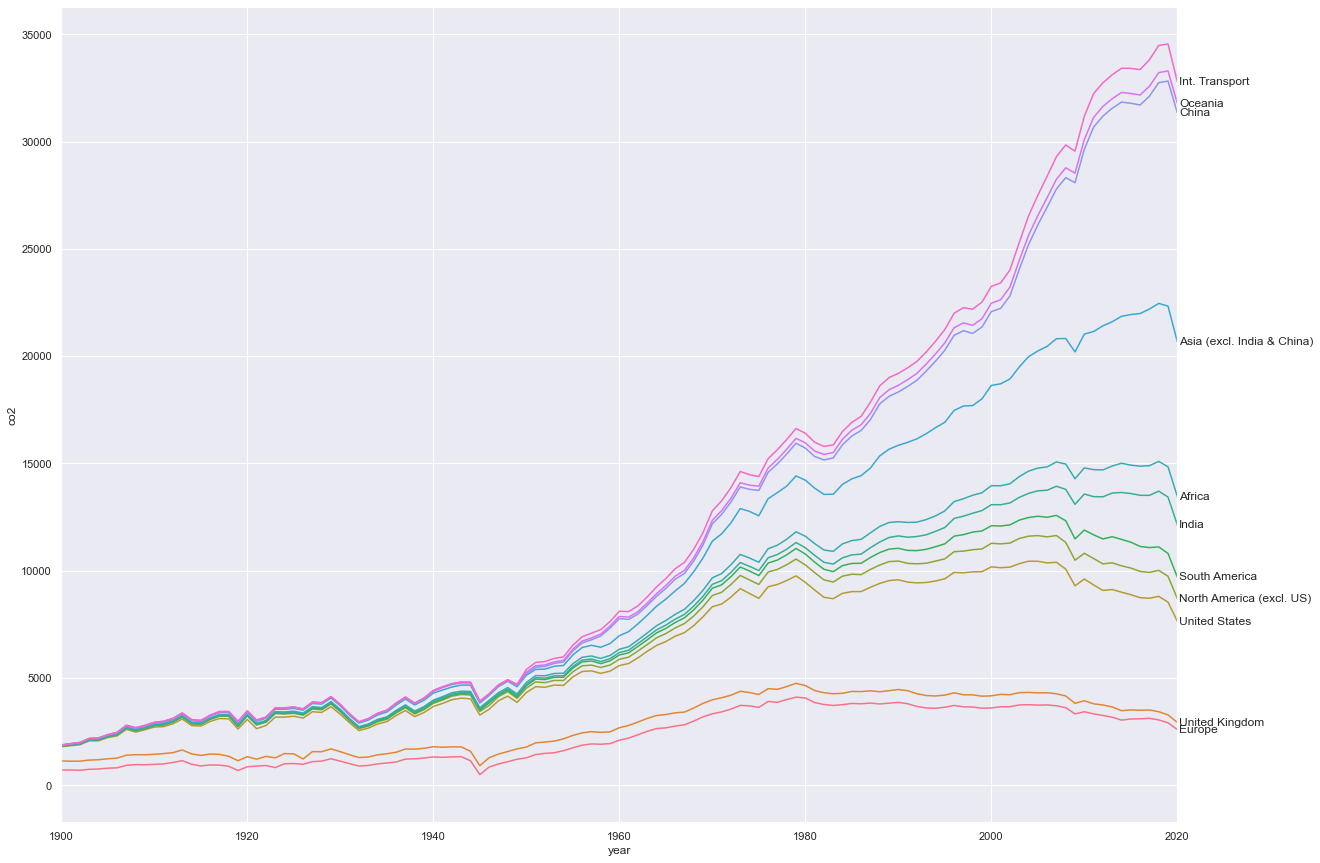

In [27]:
year_end = 2020

fig, ax = plt.subplots(figsize=(20,15))

sns.lineplot(data=fin_df, x='year', y='co2', hue='country', legend=False, ax=ax)
last_values = fin_df[['country', 'co2']][fin_df['year'] == year_end]
for country, value in last_values.itertuples(index=False):
    ax.text(x=year_end + 0.2, y=value, s=country, va="center")

ax.set_xlim([None, year_end + 0.2])
plt.xlim(1900, 2020)
plt.show()